업종내 종목 규모를 보여주는 함수

이를 통해 해당 업종내 종목의 점유율 및 변동성(수익률)을 계산하여 변화지수를 주도하고 있는 종목 파악


In [1]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import FinanceDataReader as fdr

In [4]:
import koreanize_matplotlib

In [5]:
import datetime
from dateutil.relativedelta import relativedelta

In [12]:
import plotly.express as px

In [29]:
from data_loader import load_sector_data

In [6]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', None) #None으로 설정하면 모든 행 출력

In [ ]:
# 기존 그래프
#   plt.figure(figsize=(10, 20))
#   sns.barplot(y='Name', x='Volatility', data=sector_data)
#   # 평균 변동성을 기준으로 수평선 추가
#   plt.axvline(avg_volatility, color='red', linestyle='--', label=f'평균 변동성: {avg_volatility:.2f}')
#   # 평균 변동성 수치 표시
#   plt.text(avg_volatility + 0.1, 10, f'평균 변동성 : {avg_volatility:.2f}%', color='red', va='center', fontsize=10)
#   plt.title(f'{sector} 업종 내 종목 변동성')
#   plt.xlabel('변동성')
#   plt.ylabel('종목명')
#   plt.show()

업종내 종목들의 변동성을 시각화 후 업종별로 정렬
hist 혹은 bar 형태?

In [30]:
# 특정 업종내 종목별 변동성 시각화
def get_volatility_by_stock(sector, market=None) :
  '''
  특정 업종 내 종목별 변동성을 시각화하고, 해당 업종의 평균 변동성을 출력합니다.

  Parameters:
  sector (str): 분석할 업종의 이름.

  Returns:
  None: 이 함수는 그래프를 시각화하고, 평균 변동성 및 관련 데이터를 출력합니다.

  Example:
  >>> get_volatility_by_stock('IT서비스', 'KOSPI')
  '''
  # 시장 데이터 로드
  df = sector_data = load_sector_data(market)
  
  sector_data = df[df['Sector'] == sector].sort_values(by='Volatility', ascending=False)
  
  # 해당 업종의 평균 변동성 계산
  avg_volatility = df[df['Sector'] == sector]['Volatility'].mean()
  
  # Plotly를 사용한 대화형 바 차트 생성
  fig = px.bar(sector_data, 
                    x='Volatility', 
                    y='Name', 
                    title=f'{sector} 업종 내 종목 변동성',
                    labels={'Volatility': '변동성 (%)', 'Name': '종목명'},
                    text='Volatility',
                    height=1500)

  fig.add_vline(x=avg_volatility, line_dash="dash", line_color="red", 
                  annotation_text=f'평균 변동성: {avg_volatility:.2f}%', 
                  annotation_position="top right")

  # 그래프 표시
  fig.show()
  print(f'{sector} 업종의 변동성 평균: {avg_volatility:.2f}%')
  # display(sector_data)

In [31]:
get_volatility_by_stock('IT서비스', market='KOSPI')

IT서비스 업종의 변동성 평균: 3.78%


In [27]:
get_volatility_by_stock('채권', market='ETF')

채권 업종의 변동성 평균: 0.32%


,Code,Name,Volatility,TotalReturn,AvgReturn,Sector,Volume,Amount,Marcap
436,332610,PLUS 미국단기회사채(AAA~A),1.83,4.62,0.242622,채권,3043,401,297
610,451670,RISE 국채30년레버리지(합성),1.66,-4.53,-0.214495,채권,2457,60,126
278,452250,ACE 미국30년국채선물레버리지(합성 H),1.39,-12.97,-0.655559,채권,112476,627,807
190,451530,TIGER 국고채30년스트립액티브,1.29,-2.81,-0.127196,채권,90742,5410,1475
55,458250,TIGER 미국30년국채스트립액티브(합성 H),1.15,-10.61,-0.519860,채권,177615,7035,6385
99,385560,RISE KIS국고채30년Enhanced,1.13,-2.62,-0.107815,채권,58659,4767,3446
92,472870,RISE 미국30년국채엔화노출(합성 H),1.07,-6.50,-0.305261,채권,676209,5696,3758
236,476750,ACE 미국30년국채엔화노출액티브(H),1.03,-6.91,-0.324130,채권,138141,1251,1061
767,267490,RISE 미국장기국채선물레버리지(합성 H),1.02,-10.22,-0.516334,채권,4297,23,71
527,481340,RISE 미국30년국채액티브,0.93,-4.18,-0.194859,채권,63301,634,181


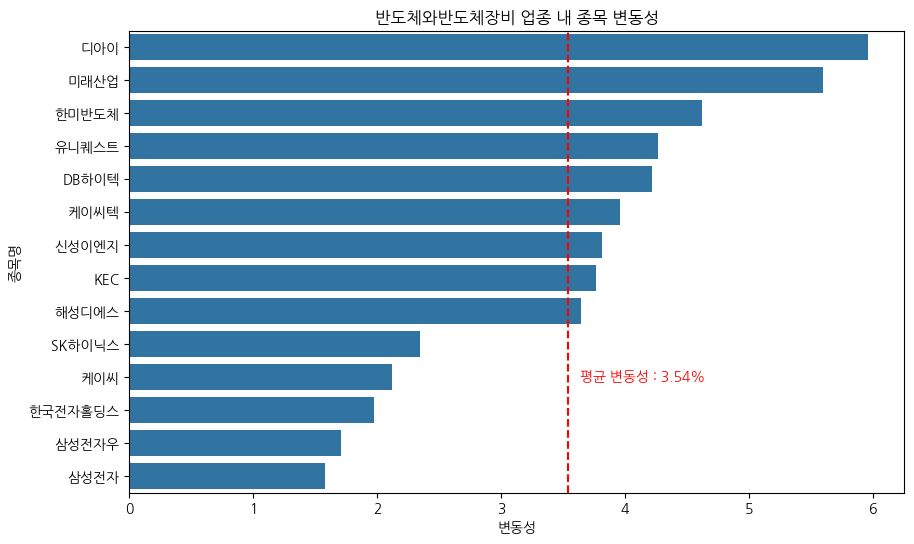

반도체와반도체장비 업종의 변동성 평균: 3.54%


In [66]:
get_volatility_by_stock('반도체와반도체장비', new_kospi_df)

In [ ]:
df = pd.read_csv('sector_by_stock_list_df.csv')

In [32]:
new_kospi_df.sort_values(by='Sector').head()

,Code,Name,Volatility,TotalReturn,AvgReturn,Sector,Volume,Amount,Marcap
329,034310,NICE,1.579579,-0.720072,-0.030848,IT서비스,21447,237770650,409526715260
43,018260,삼성에스디에스,2.285538,-13.997308,-0.697982,IT서비스,147086,18643307200,9888882840000
884,007120,미래아이앤지,2.783828,-16.633858,-0.941619,IT서비스,77041,65405886,24460180976
400,012030,DB,3.889940,-6.071429,-0.385695,IT서비스,1528517,1978536238,264543721895
428,035510,신세계 I&C,9.187633,72.696246,3.203094,IT서비스,20812289,340767102570,231776437200


In [71]:
# 특정 업종내 종목별 수익률 시각화

def get_return_by_stock(sector, df) :
  '''
  특정 업종 내 종목별 수익률을 시각화하고, 해당 업종의 평균 수익률을 표시합니다.

  Parameters:
  sector (str): 분석할 업종의 이름.
  df (pd.DataFrame): 종목 정보를 포함하는 전처리가 완료된 데이터프레임. 
                    데이터프레임은 'Sector', 'TotalReturn', 'Name' 열을 포함해야 합니다.

  Returns:
  None: 이 함수는 그래프를 시각화하고, 평균 수익률 정보를 출력합니다.

  Example:
  >>> get_return_by_stock('IT서비스', new_kospi_df)
  
  '''
  
  sector_data = df[df['Sector'] == sector].sort_values(by='TotalReturn', ascending=False)
   
  plt.figure(figsize=(10, 6))
  sns.barplot(y='Nam                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         e', x='TotalReturn', data=sector_data)
  
  # 해당 업종의 평균 수익률 계산
  avg_total_return = df[df['Sector'] == sector]['TotalReturn'].mean()
  
  # 평균 수익률을 기준으로 수평선 추가
  plt.axvline(avg_total_return, color='red', linestyle='--', label=f'평균 수익률: {avg_total_return:.2f}')
  
  # 평균 수익률 수치 표시
  plt.text(avg_total_return + 0.1, 10, f'평균 수익률 : {avg_total_return:.2f}%', color='red', va='center', fontsize=10)
  
  plt.title(f'{sector} 업종 내 종목 수익률 평균')
  plt.xlabel('수익률')
  plt.ylabel('종목명')
  plt.show()
  
  
  print(f'{sector} 업종의 수익률 평균: {avg_total_return:.2f}%')
  display(sector_data)
  

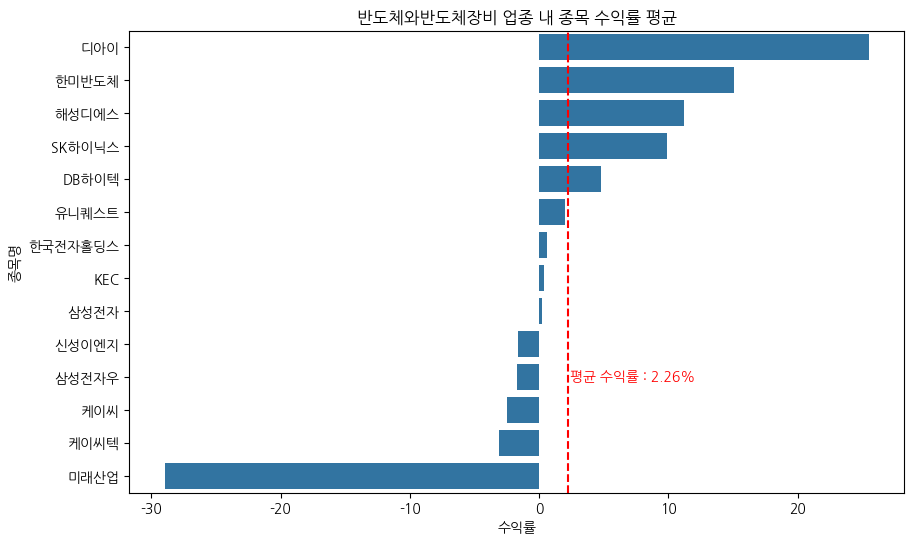

반도체와반도체장비 업종의 수익률 평균: 2.26%


,Code,Name,Volatility,TotalReturn,AvgReturn,Sector,Volume,Amount,Marcap
338,003160,디아이,5.955740,25.522252,1.261167,반도체와반도체장비,2483535,33656565150,391106000000
50,042700,한미반도체,4.619404,15.076072,0.672599,반도체와반도체장비,660429,55465247700,8038306348800
336,195870,해성디에스,3.646385,11.190476,0.461510,반도체와반도체장비,63172,1501871400,396950000000
1,000660,SK하이닉스,2.346059,9.886650,0.487213,반도체와반도체장비,2643523,459886497400,127036412692500
156,000990,DB하이텍,4.214063,4.793388,0.133492,반도체와반도체장비,163691,5262527000,1407435239600
631,077500,유니퀘스트,4.261128,1.992032,0.178933,반도체와반도체장비,162635,821224685,110592522240
860,006200,한국전자홀딩스,1.969498,0.580552,-0.034538,반도체와반도체장비,27185,18967604,32434573248
539,092220,KEC,3.762751,0.387597,0.025725,반도체와반도체장비,470609,366177282,155992960557
0,005930,삼성전자,1.578523,0.186567,-0.036956,반도체와반도체장비,10747196,576022861800,320577322935000
421,011930,신성이엔지,3.816899,-1.623932,-0.150712,반도체와반도체장비,358863,416573632,236931221801


In [72]:
get_return_by_stock('반도체와반도체장비', new_kospi_df)